# Technology shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
- 4. [Figures](#toc4_)    
  - 4.1. [Effect on the Production firms, Phillips-curve and Investments](#toc4_1_)    
  - 4.2. [Effect on the Labor agency, Labor search & match, and Wages](#toc4_2_)    
  - 4.3. [Effect on Prices](#toc4_3_)    
  - 4.4. [Effect on Government](#toc4_4_)    
  - 4.5. [Effect on Consumption and Export](#toc4_5_)    
  - 4.6. [Other](#toc4_6_)    
    - 4.6.1. [Households - life-cycle](#toc4_6_1_)    
    - 4.6.2. [Long-term](#toc4_6_2_)    
    - 4.6.3. [National accouting - quantities](#toc4_6_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')            #create baseline model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [20]:
par.t_b = 0
par.delta_B = 0
par.eta = 0.0
par.Psi_0 = 5.0

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

In [21]:
model.find_ss()                 #find steady state

In [22]:
model.calc_jac(do_print=True)   #calculate jacobian

Jacobian calculated in 26.7 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

In [23]:
model.set_exo_ss()              #set steady state exogenous variables

In [24]:
Tshock = 50                                                 #length of shock
persistence = 0.80**np.arange(Tshock)                       #persistence of shock     
sol.Gamma[:Tshock] = ss.Gamma*(1 + 0.01*persistence)        #shock to technology parameter

In [25]:
model.find_IRF()                #find impulse response functions 

initial:
t1-t0 = 0.01097 secs
it = 7
    max. abs. error = 8.19e-11
    3.21e-12 in A_R_ini_error
    5.24e-14 in Aq_diff
    4.50e-13 in FOC_capital_agency
    3.20e-12 in FOC_K_ell
    8.19e-11 in mkt_clearing
    4.80e-13 in PC

solve: t1-t0 = 0.08477 secs
evaluate + update: t3-t2 = 0.06183 secs


## 4. <a id='toc4_'></a>[Figures](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Effect on the Production firms, Phillips-curve and Investments](#toc0_)

#### Production firms

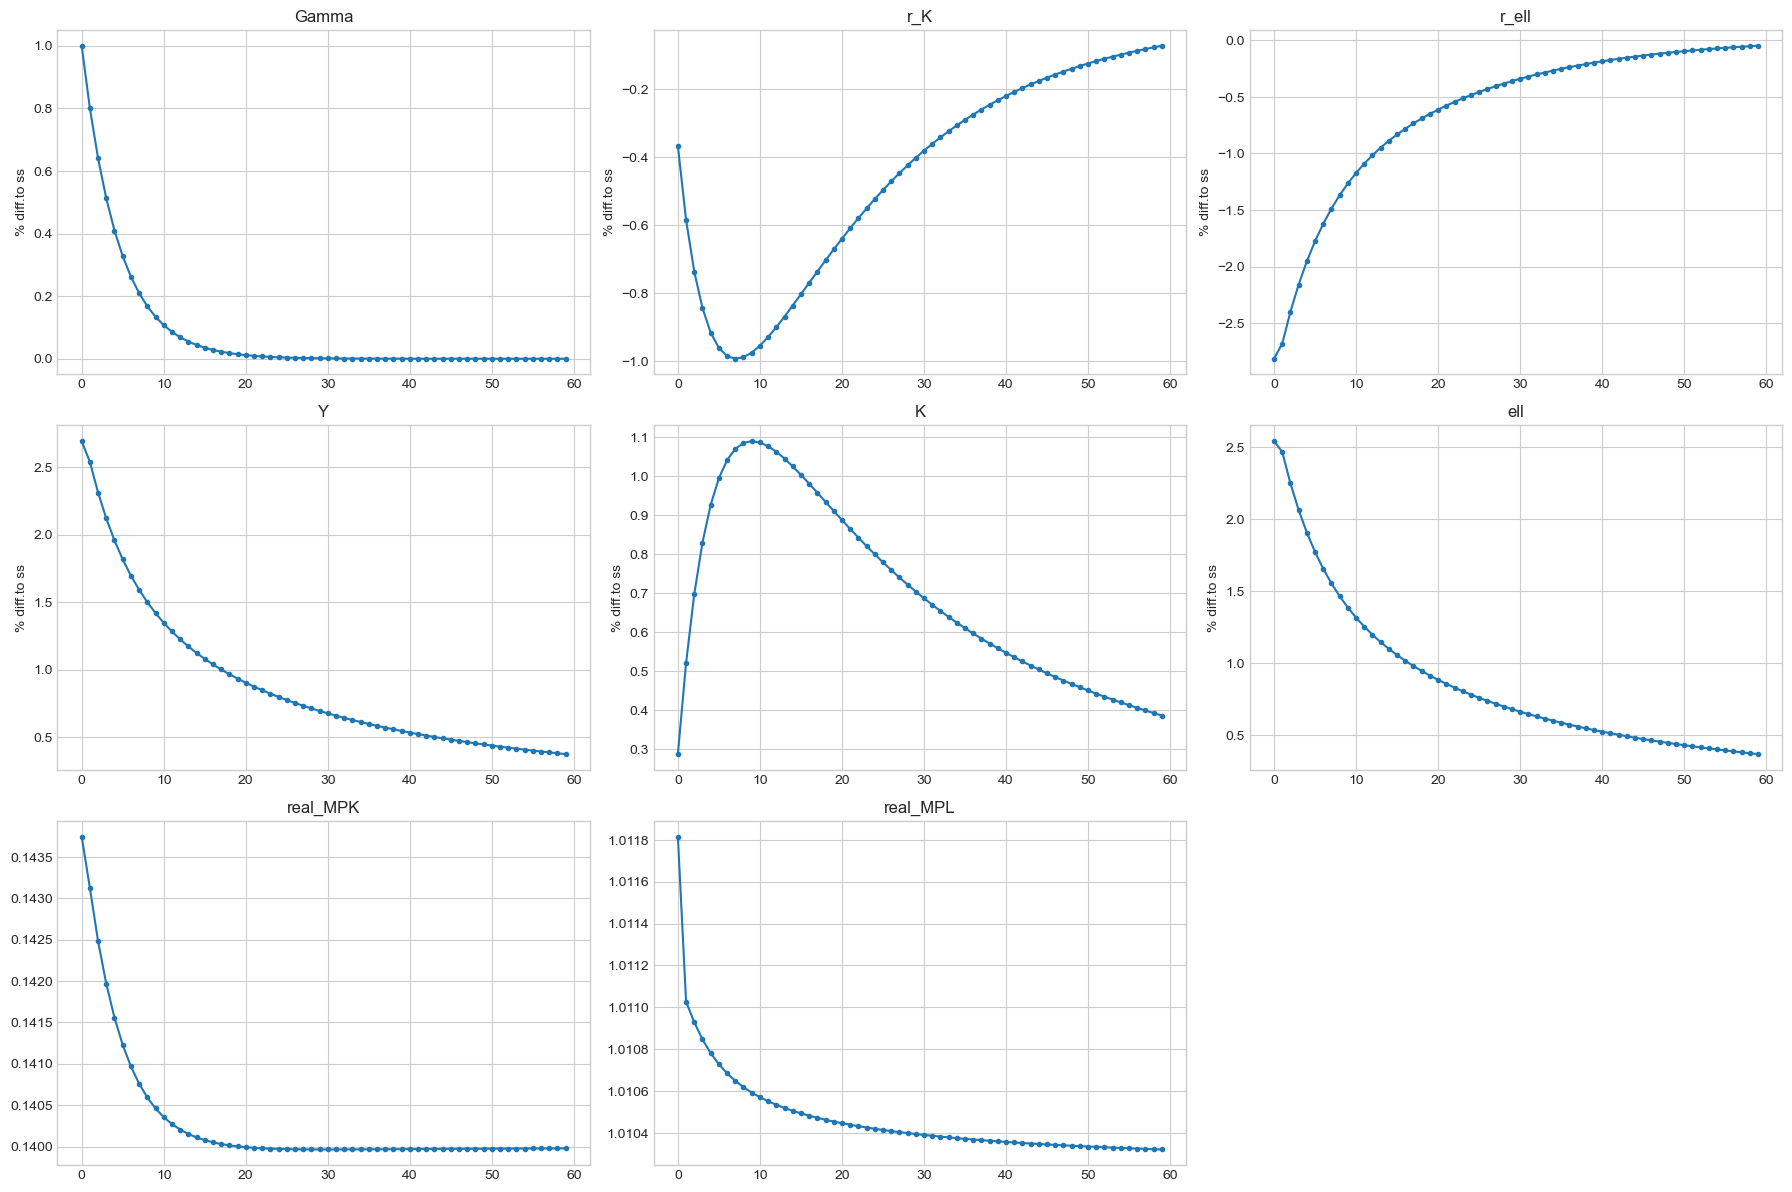

In [26]:
model.plot_IRF(varlist=['Gamma','r_K','r_ell','Y','K','ell','real_MPK','real_MPL'],ncol=3, abs=['real_MPK','real_MPL'])

#### Phillips-curve

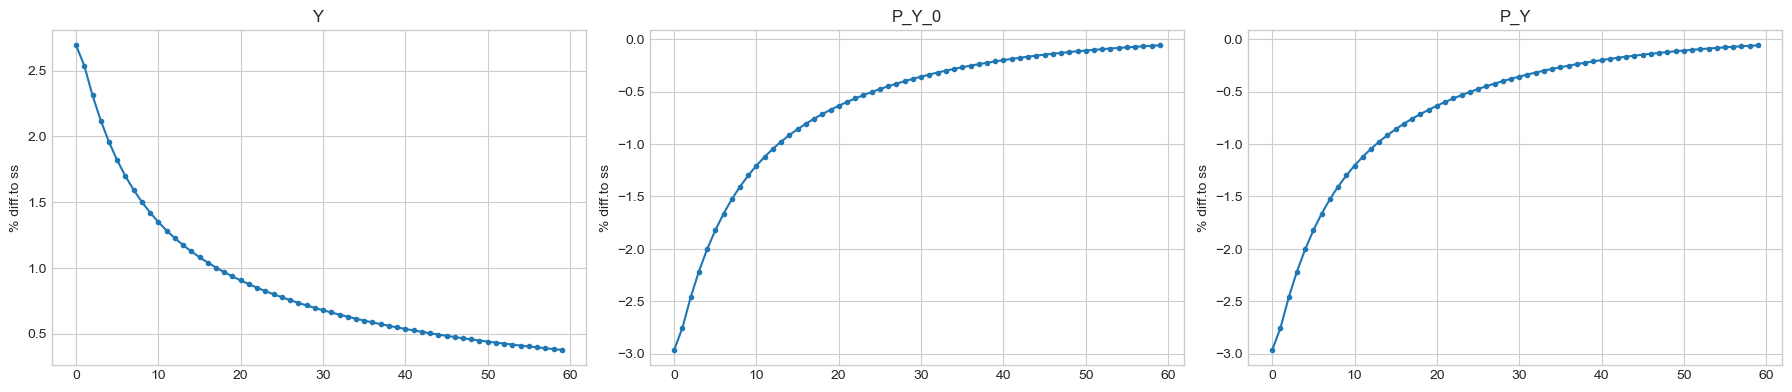

In [27]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'],ncol=3)

#### Investments

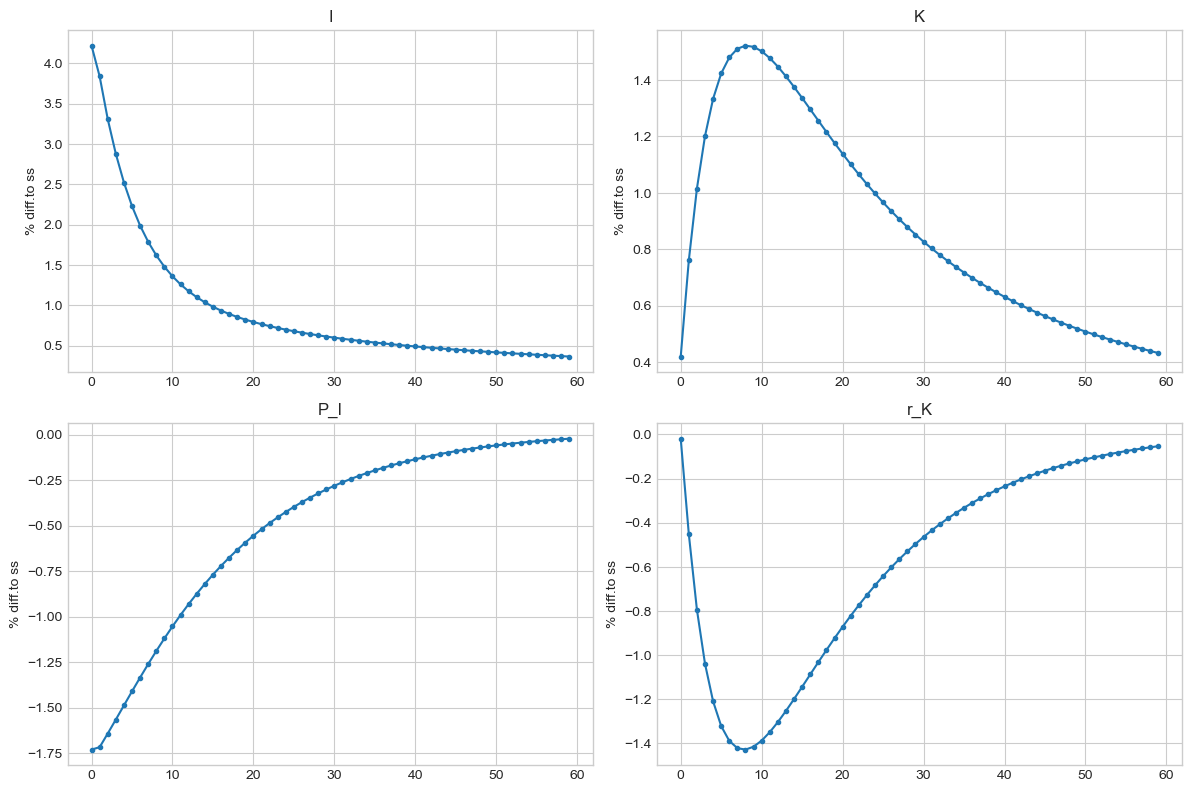

In [12]:
model.plot_IRF(varlist=['I','K','P_I','r_K'],ncol=2)

### 4.2. <a id='toc4_2_'></a>[Effect on the Labor agency, Labor search & match, and Wages](#toc0_)

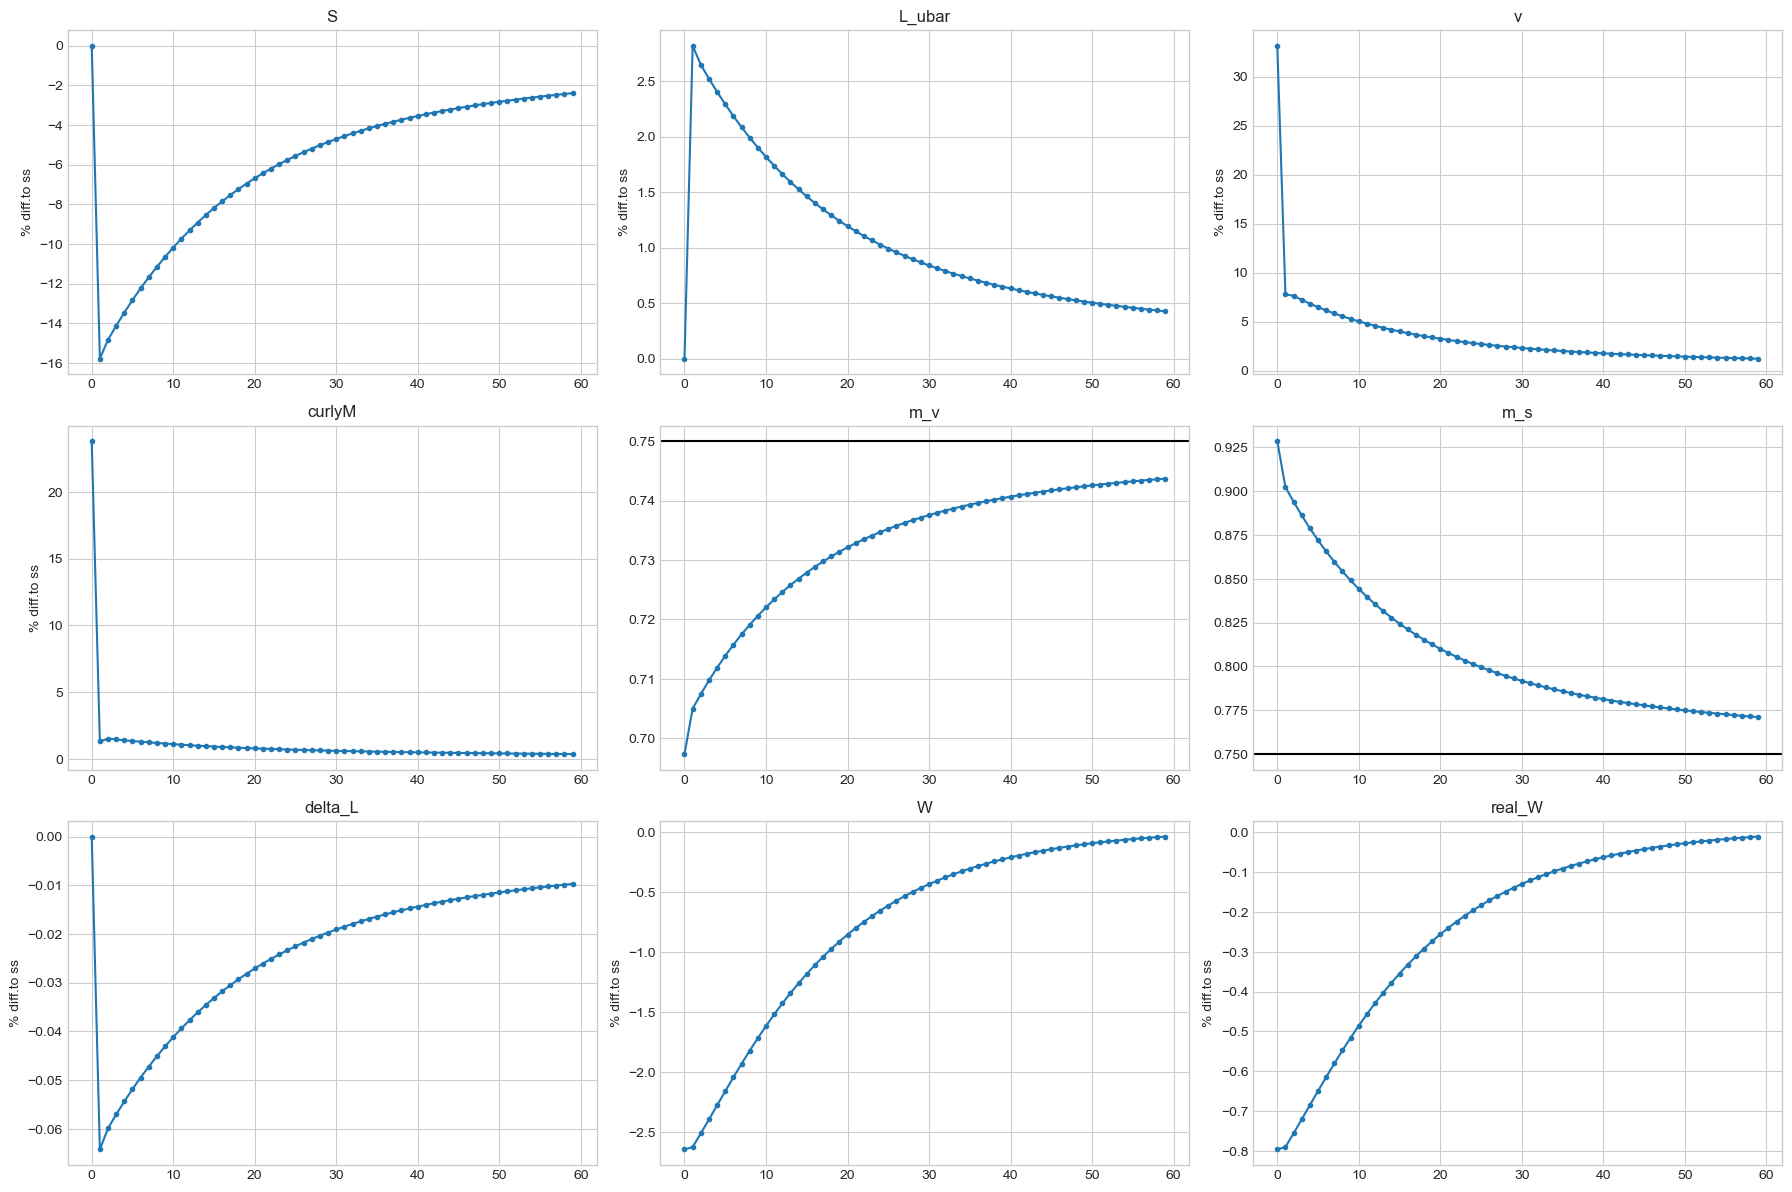

In [13]:
model.plot_IRF(varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 4.3. <a id='toc4_3_'></a>[Effect on Prices](#toc0_)

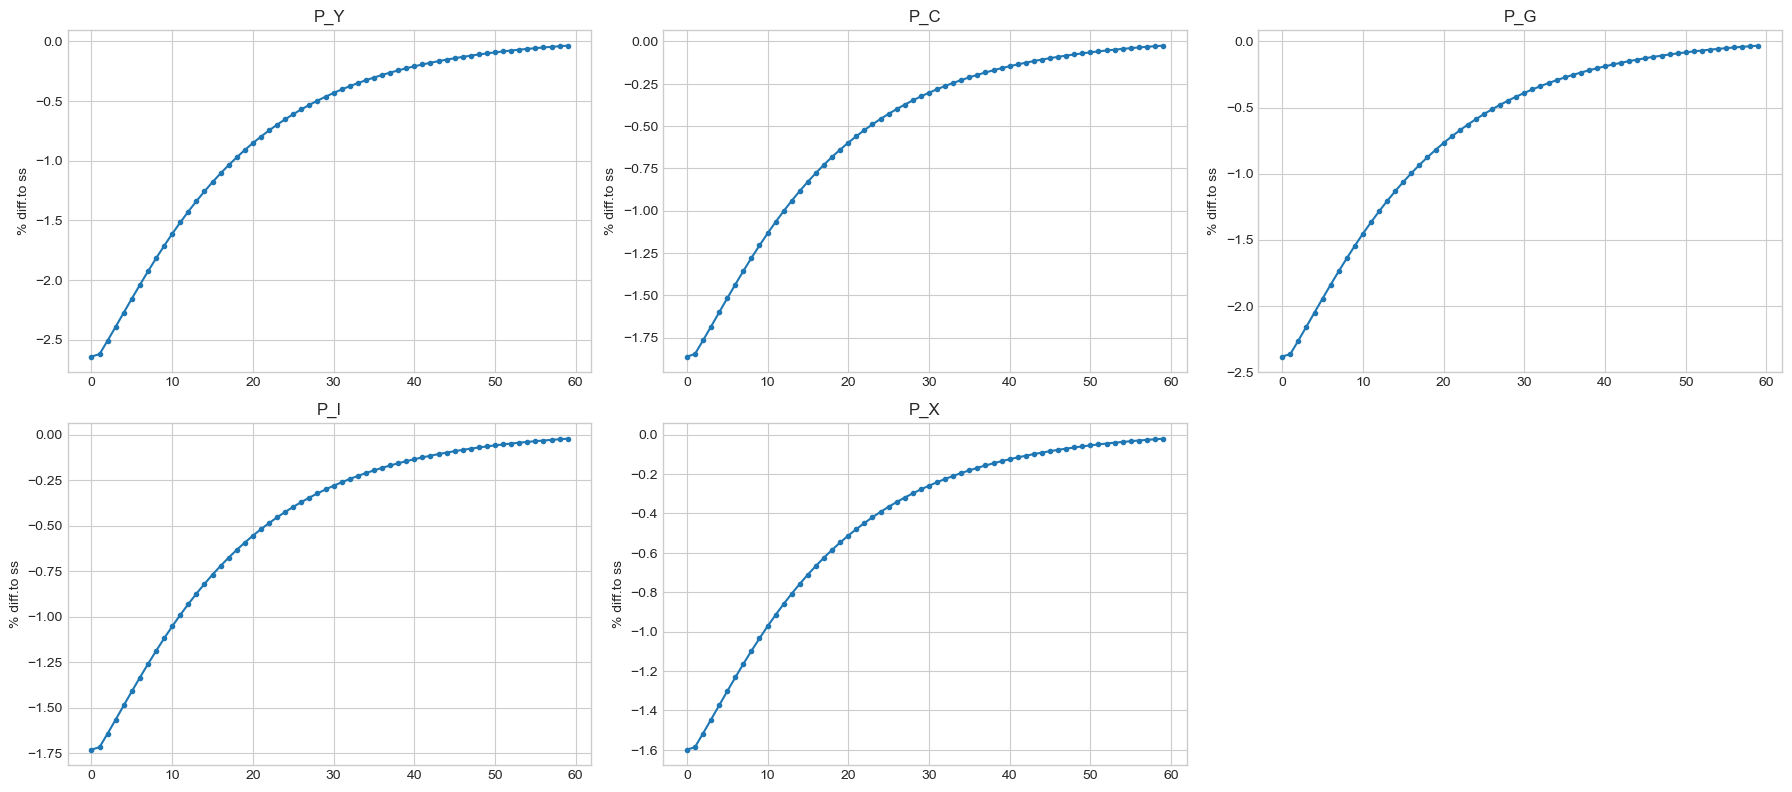

In [14]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X'])

### 4.4. <a id='toc4_4_'></a>[Effect on Government](#toc0_)

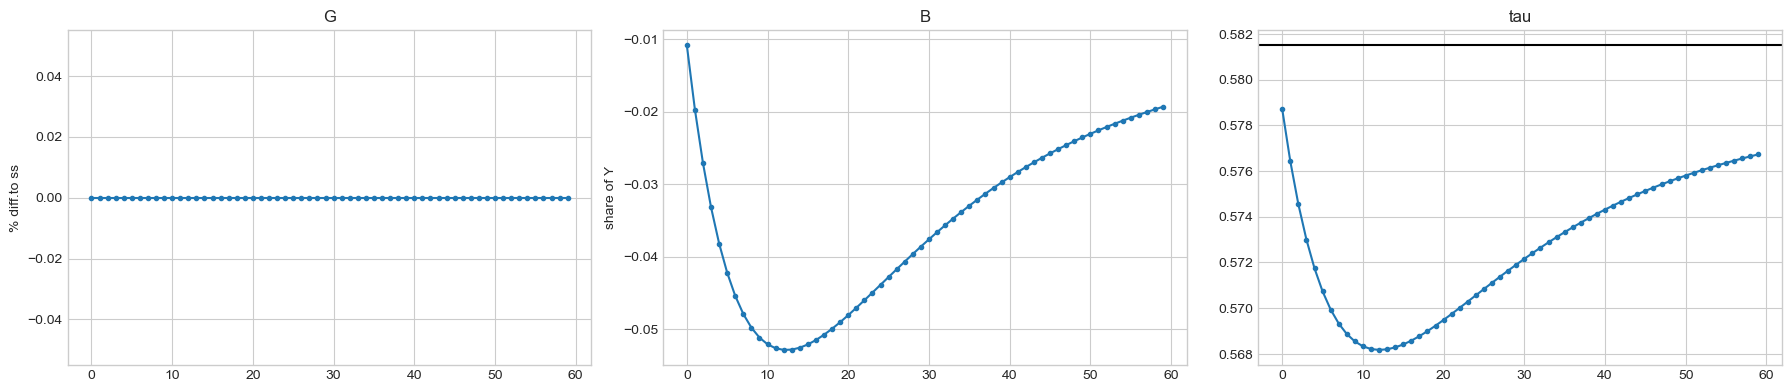

In [15]:
model.plot_IRF(varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### 4.5. <a id='toc4_5_'></a>[Effect on Consumption and Export](#toc0_)

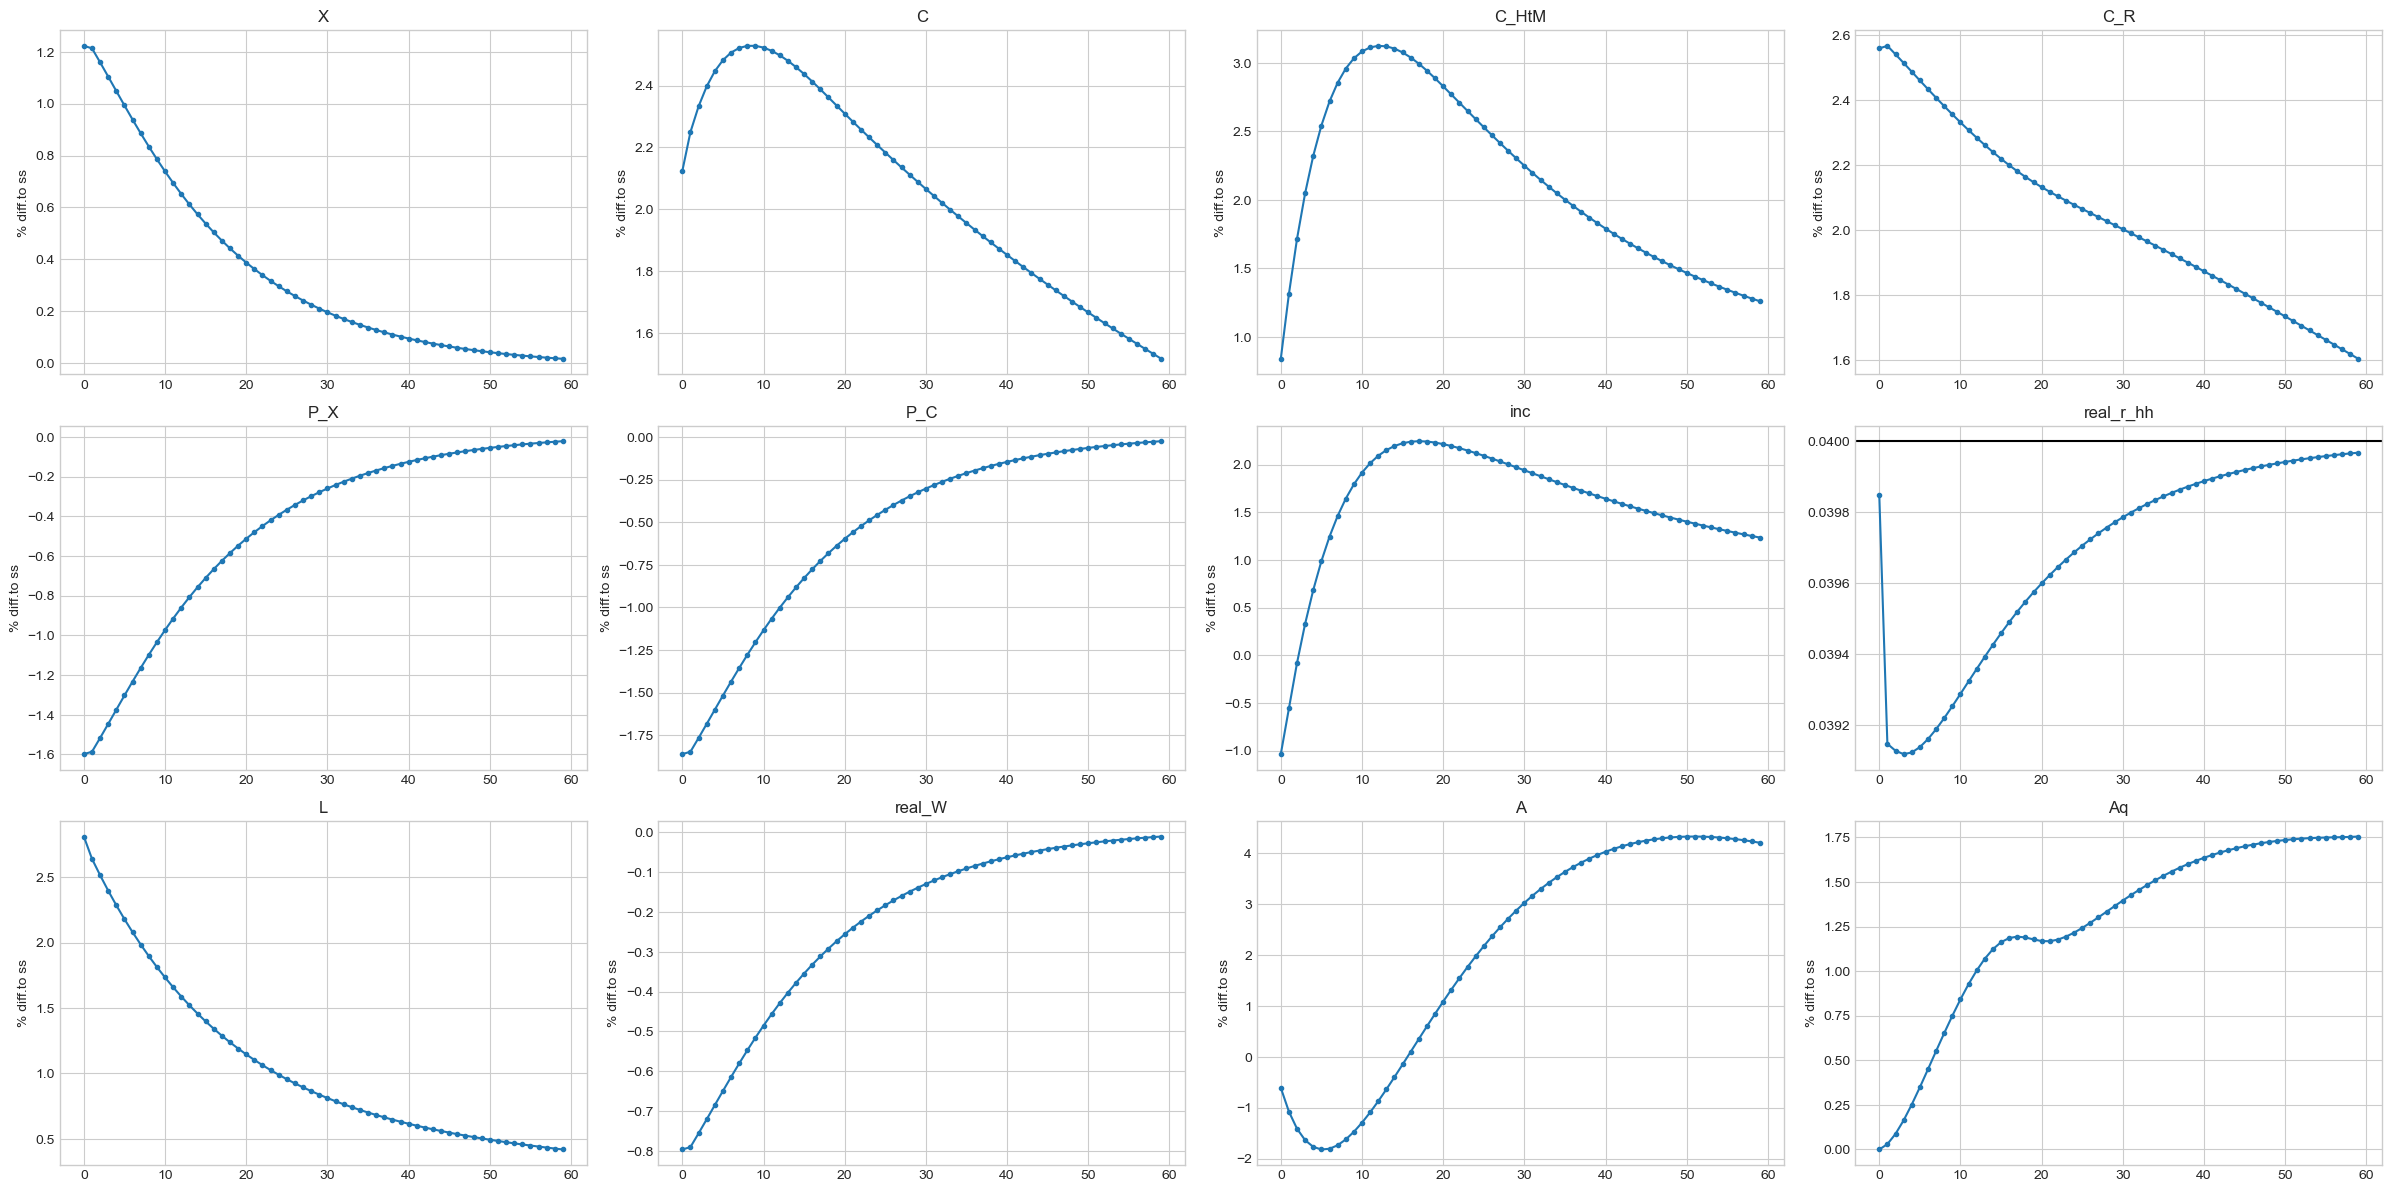

In [16]:
model.plot_IRF(varlist=['X','C','C_HtM','C_R','P_X','P_C','inc','real_r_hh','L','real_W','A','Aq'],ncol=4,abs=['real_r_hh'])

### 4.6. <a id='toc4_6_'></a>[Other](#toc0_)

#### 4.6.1. <a id='toc4_6_1_'></a>[Households - life-cycle](#toc0_)

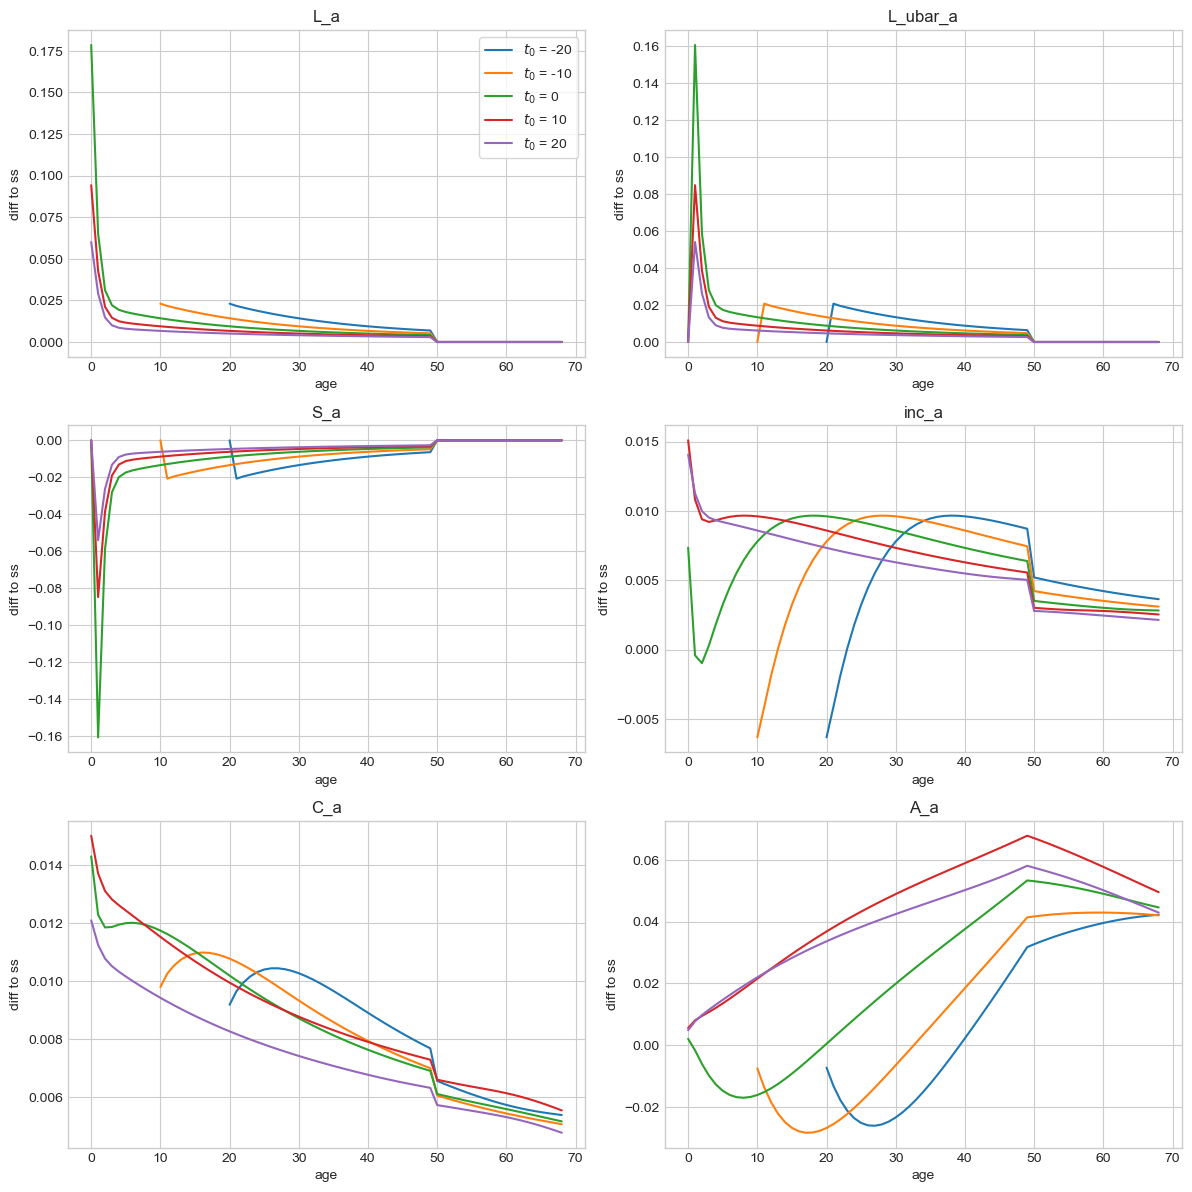

In [17]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])

#### 4.6.2. <a id='toc4_6_2_'></a>[Long-term](#toc0_)

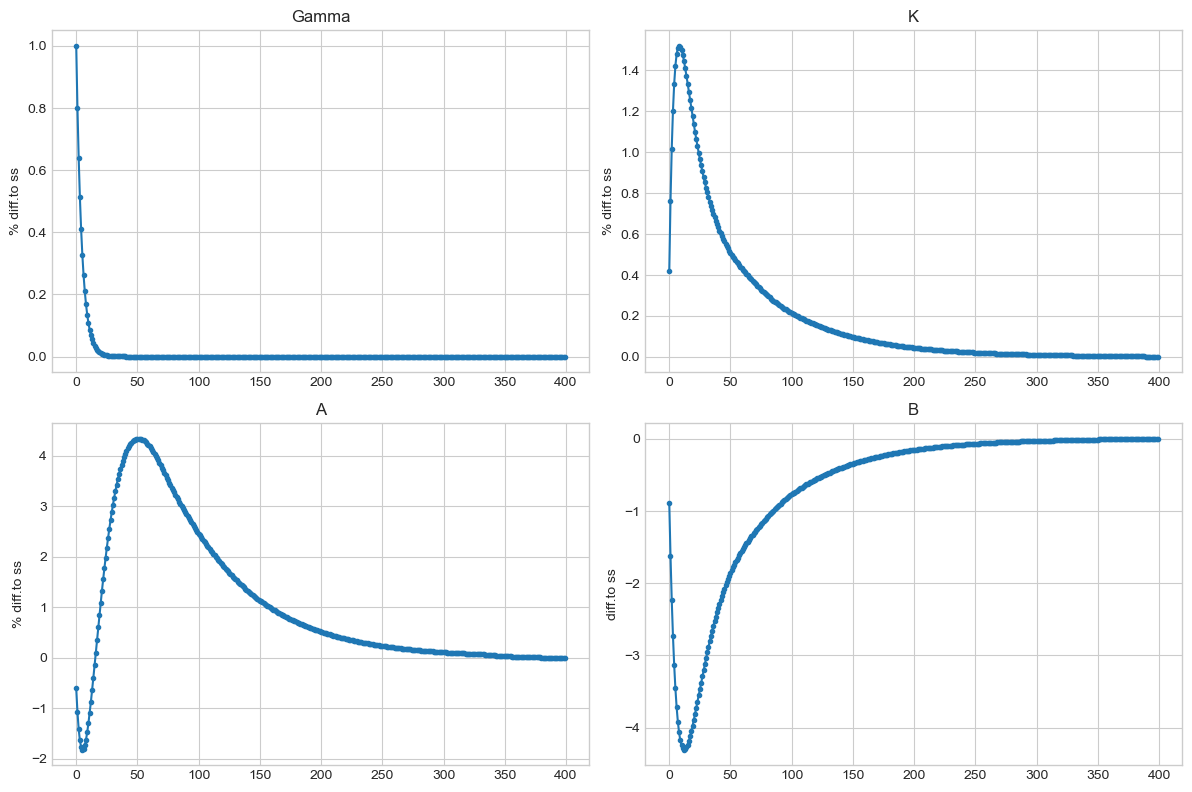

In [18]:
model.plot_IRF(varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2)

#### 4.6.3. <a id='toc4_6_3_'></a>[National accouting - quantities](#toc0_)

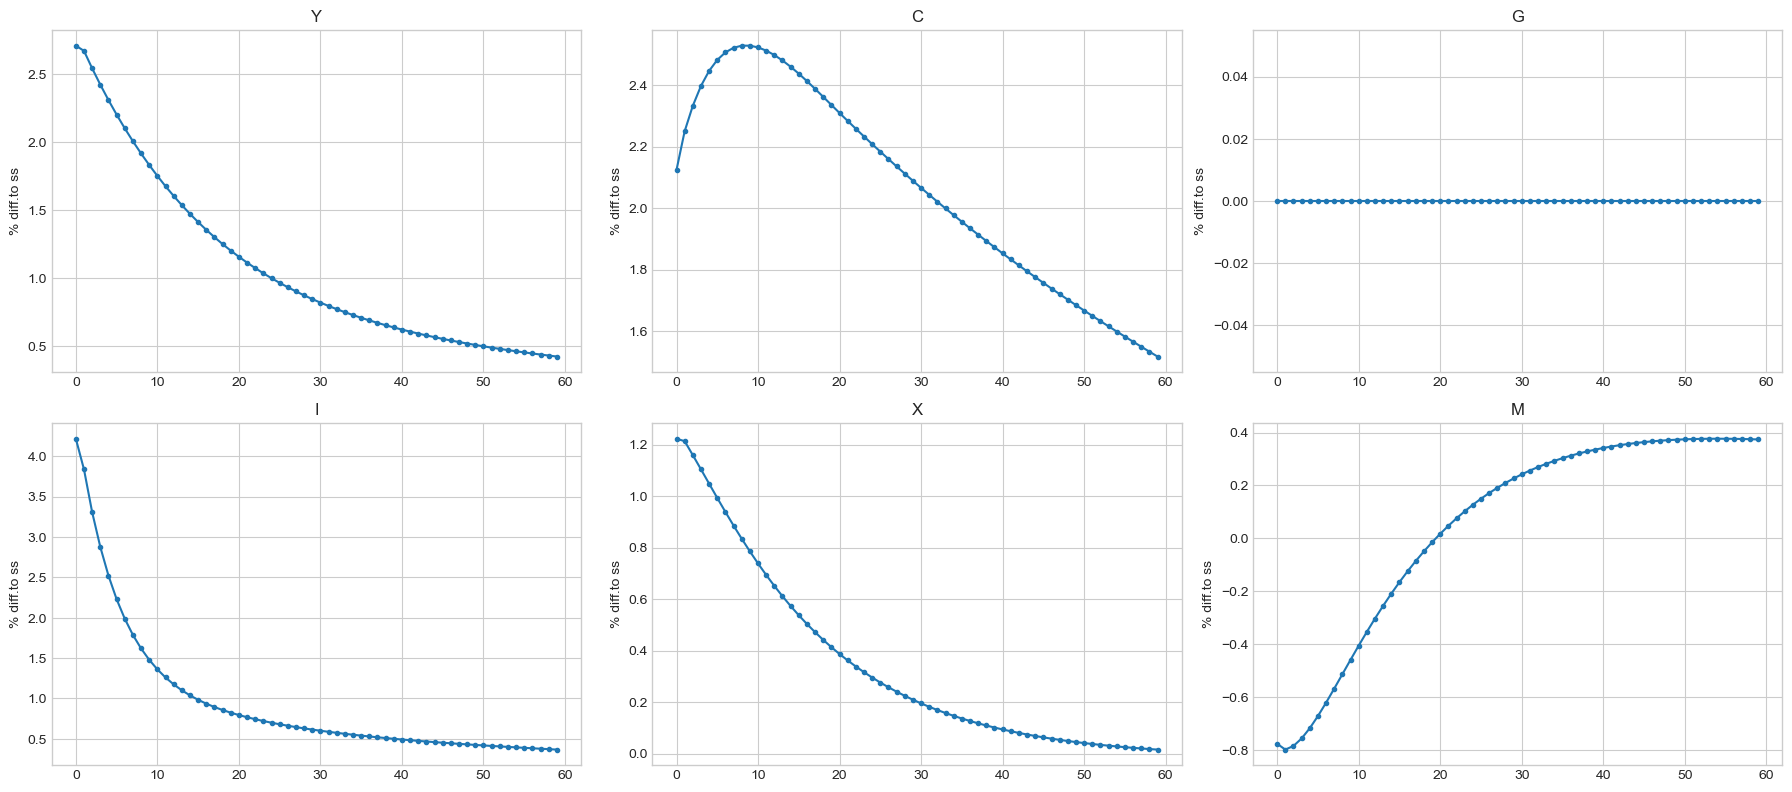

In [19]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])